
### Link to Source Code 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/my-blog-post-04-linear-regress) is a link to the source code for this Linear Regreession blog post.
### Link to reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-linear-regression.html) is a link to the main reference we use as we implement our linear regression model.

### Introduction
In this blog post let us take a look at Linear Regression. Linear regression, especially OLS (ordinary least squares) regression, is the bread and butter of many fields like economics and statistics. When we first learn about OLS regression, often times it was in some other setting, at least for yours truly. I have learned this in a economics class on regression analysis. However, we could easily formulate the same concept in a way that's closer to the style of machine learning, and specifically classification tasks. For OLS linear regression, the loss function is 
$$
\ell (\hat{y}, y) = (\hat{y} - y)^2,
$$
where $\hat{y} = \langle w, x \rangle$ is the predicted labels (which the inner product of $w$, the weights, and $x$, our data point), and $y$ is the true label. Hence, when we are trying to minimize loss, we are trying to minimize the squared difference between our prediction and the true label. The empirical risk minimization problem is
$$
\hat{w} = \argmin_{w} L(w) \\
$$
where
$$
 L(w) = \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \lvert \lvert Xw - y \rvert \rvert ^2_2.\\
$$
Hence, least square is simply referring to minimizing the sum of squares for the loss function.





Before we start the implementation, we first record the following code snippet that will help us to automatically load our source code when we are constantly editing the `.ipynb` and `.py` files.

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, let's import some libraries, then we perform our `fit_gradient` and `fit_analytic` on the following simple data set with only one features to visualize our linear regression.

In [21]:
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (18,6)
plt.rcParams['figure.dpi'] = 156 
plt.rcParams['savefig.dpi'] = 156 
from linear_regression import LinearRegression 

In [22]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

### Fitting Linear Regression using gradient descent; a.k.a. `fit_gradient`
In `fit_gradient`, the key step is to compute the gradient using a descent algorithm so that we could solve the following problem:
$$ \hat{w} = \arg \min_{w} L(w). $$ 
Equivalently, we could unpact this equation:
$$ \hat{w} = \sum_{i=1}^{n} \ell(\hat{y}_i, y_i) = \argmin_{w} \sum_{i=1}^{n} ( \langle w, x_i \rangle - y_i)^2.$$
Recall that our loss function is of the form $ \ell(\hat{y}, y) = (\hat{y}-y)^2 $ since we are using ordinary least square regression. 


We start by taking derivative with respect to $w.$ Using chain rule for matrices, we obtain the following expression:
$$ \nabla L(w) = 2 X^{T}(X\cdot w -y).$$
Then, we use gradient descent to find the $w$ that is "good enough." We achieve this by the following iteration:
$$ w^{(t+1)} \leftarrow w^{(t)} - 2 \cdot \alpha \cdot X^{T} (X \cdot w^{(t)} - y).$$


We use the following code block to generate a small data set for testing our linear regression implementation. Let's plot our data, and in this 2-Dim case we could see the linear pattern with our eyes, and it's quite intuitive that the best-fit-line obtained by our algorithm should also "fit" the data visually as if we were to draw it by hand on the plot of this sythetic data set.

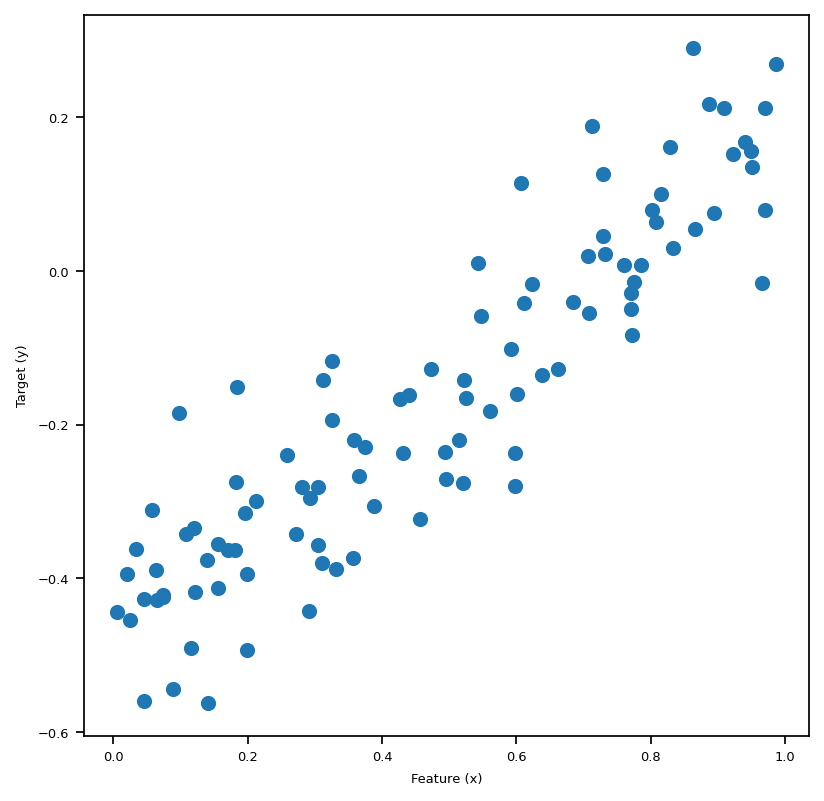

In [23]:
# We start by generate a small data set.
w0 = -0.5
w1 =  0.7
n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1)

plt.figure(figsize=(6,6))
plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

We are able to generate data and visualize this problem when `p_features = 1`. Graphically, we are trying to draw a line "of best fit" through the data points in the sense of OLS, which stands for Ordinary Least Squares. The line we draw just means given the feature `x`, we find the corresponding predicted `y` using the line, which will be close to the original `y`, if we have done a good job.

After importing `linear_regression.py`, we could call the `fit_gradient` method that implements the gradient descent algorithm for us, as illustrated in the above cell. In the following cell, we plot the "line of best fit" using the weights `LR1.w` that we obtained after running `fit_gradient`. Also, we print out the weights vector `w` that we fited, which seems to be doing a good job judging from the pictures below, plotted together with Lasso and `fit_analytic`. 

In [38]:
LR1 = LinearRegression()
X_ = LR1.pad(x)
LR1.fit_gradient(X_, y, alpha=0.0001, max_epochs=1e4)
print(f"the weights that we obtained after calling fit_gradient are: {LR1.w}")

the weights that we obtained after calling fit_gradient are: [[ 0.62864267]
 [-0.46564827]]


### Using LASSO from `scikit-learn`
Roughly, LASSO algorithm is OLS regression plus a regulariation term, so the loss function looks like this:
$$
L(w) = \lvert \lvert Xw - y \rvert \rvert ^2_2 + \lvert \lvert w' \rvert \rvert_1.\\
$$
Where 
$$
\lvert \lvert w' \rvert \rvert_1 = \sum_{j=1}^{p-1} |w_j|.\\
$$
Hence, we could think of this regularization term as some sort of penalty term when we have problems with *overparameterization*. In this post, we are not going to dive deep into the details of LASSO regression, so we are just going to use the implementation from `scikit-learn`. Again, we plot the result of fitting this regression together with the `fit_gradient` and `fit_analytic` in the big visualization below.


In [39]:
L.fit(x,y)
L.score(x,y)
print("*")
L_w = np.hstack([L.coef_, L.intercept_])
print(f"the weights that we obtained after calling fit_gradient are: {L_w}")

*
the weights that we obtained after calling fit_gradient are: [ 0.6426091  -0.47312394]


### Fitting Linear Regression using a analytic formula; a.k.a. `fit_analytic`
Similarly to `fit_gradient`, we also have a method called `fit_analytic`, which uses a formula to compute the weights `w` exactly, and this is implemented using the followiing equation:
$$ \hat{w} = (X^T X)^{-1} X^T y, $$ 
where $\hat{w}$ denotes the weights we obtained after calling the function `fit_analytic`. Note that in order for this formula to make sense, we need `X` to be a invertible matrix. Now, with the math part out of the way, let's see this in action in the following block, where we plot the three regressions we introduced so far together in one plot.

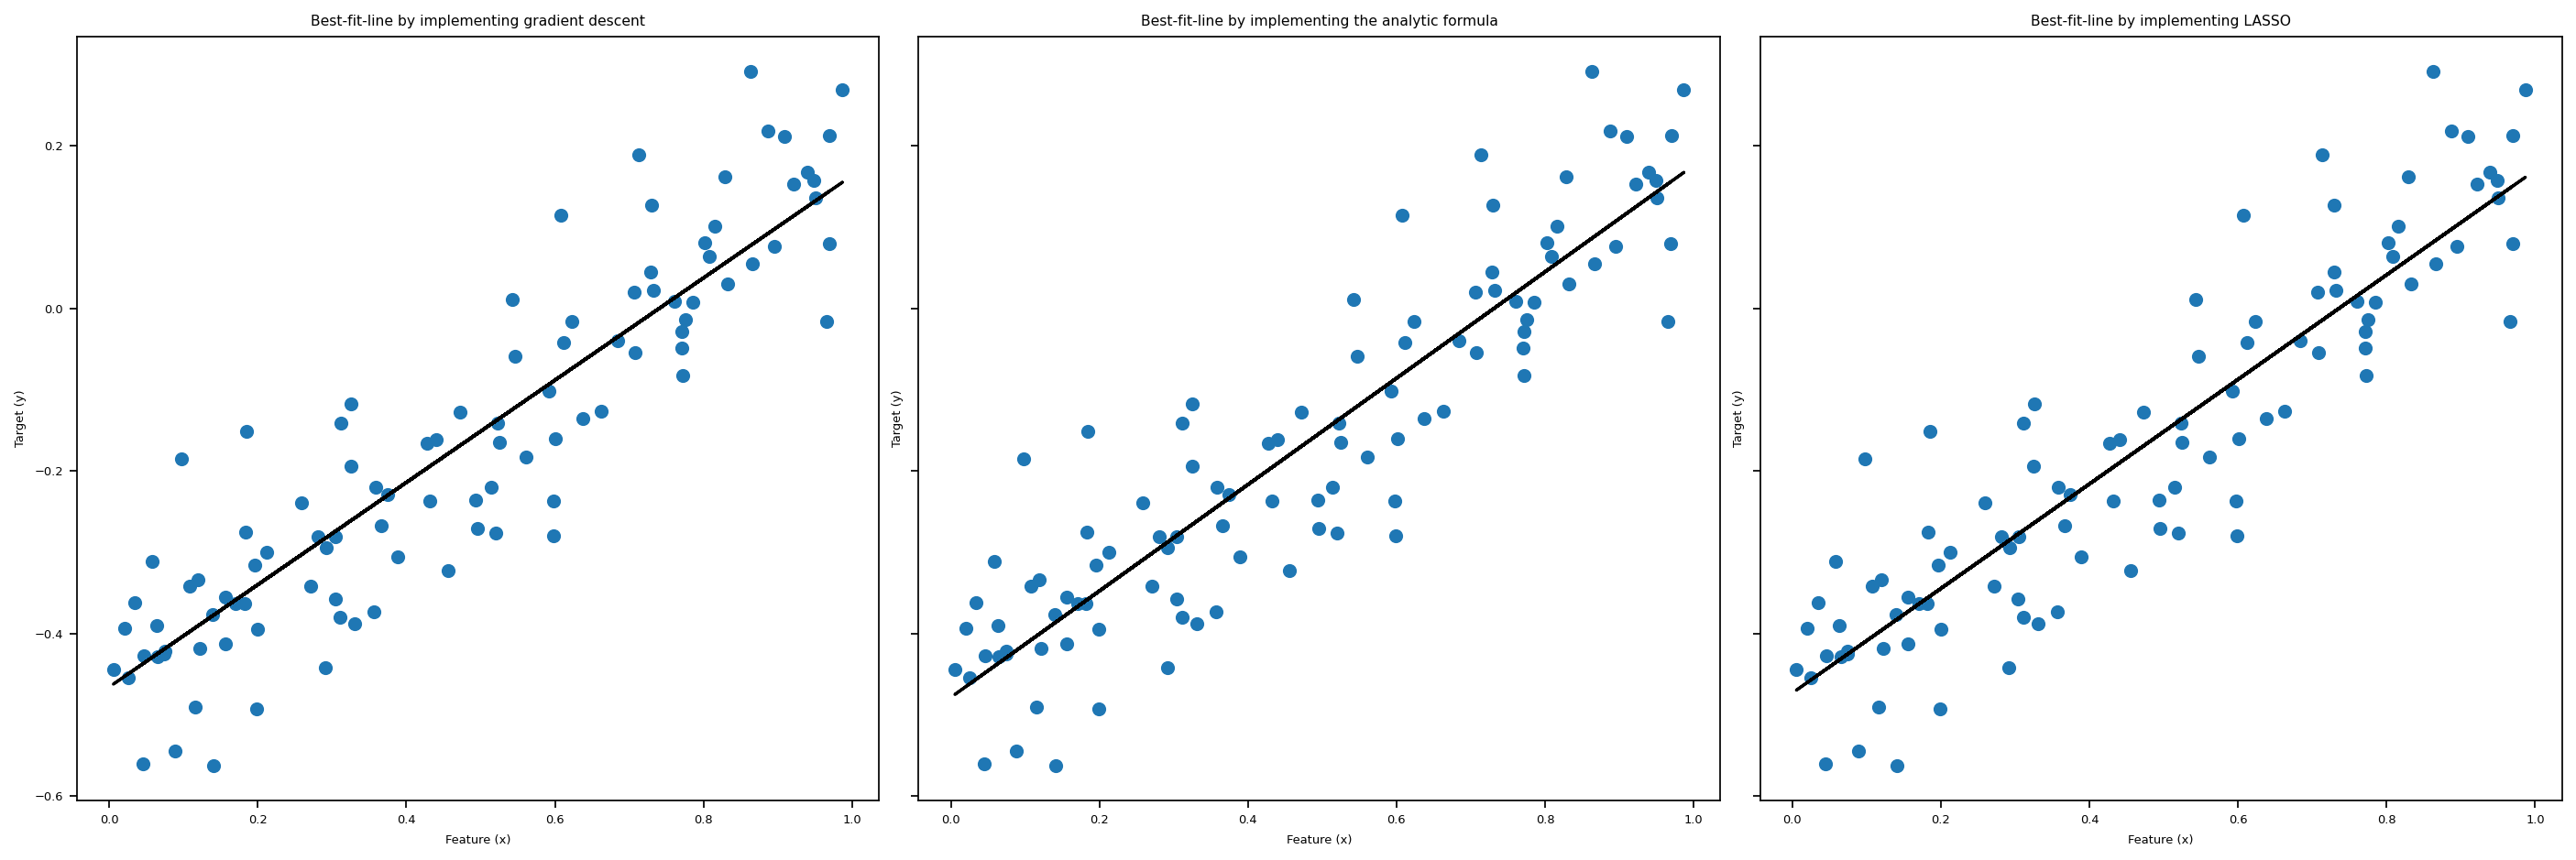

In [26]:
matplotlib.rc('font', size=6)
# gradient
LR1 = LinearRegression()
X_ = LR1.pad(x)
LR1.fit_gradient(X_, y, alpha=0.0001, max_epochs=1e4)

fig, axarr = plt.subplots(1, 3, sharex = True, sharey = True)
axarr[0].scatter(x,y)
axarr[0].plot(x, X_@LR1.w, color = "black")

# Analytic 
LR2 = LinearRegression()
X_ = LR2.pad(x)
LR2.fit_analytic(X_,y)

axarr[1].scatter(x,y)
axarr[1].plot(x, X_@LR2.w, color = "black")

# LASSO
axarr[2].scatter(x,y)
axarr[2].plot(x, X_@L_w, color = "black")

labs = axarr[0].set(title="Best-fit-line by implementing gradient descent", xlabel = "Feature (x)", ylabel = "Target (y)")
labs = axarr[1].set(title="Best-fit-line by implementing the analytic formula", xlabel = "Feature (x)", ylabel = "Target (y)")
labs = axarr[2].set(title="Best-fit-line by implementing LASSO", xlabel = "Feature (x)", ylabel = "Target (y)")

plt.tight_layout()

# More than one feature
Now we use the following function to create both testing and validation data. At this stage, we could experiment with more features. We use the following code to create artificial data sets that has any number of features that we specify.

In [27]:
def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
        # print(w)
    
    X_train = np.random.rand(n_train, p_features)
    y_train = LR.pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = LR.pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

When the number of features is one, `p_features = 1`, we could plot the artificial training data set and the validation data set. We lose this luxury when we have 2 or more features. Let's plot the data set we are going to use.

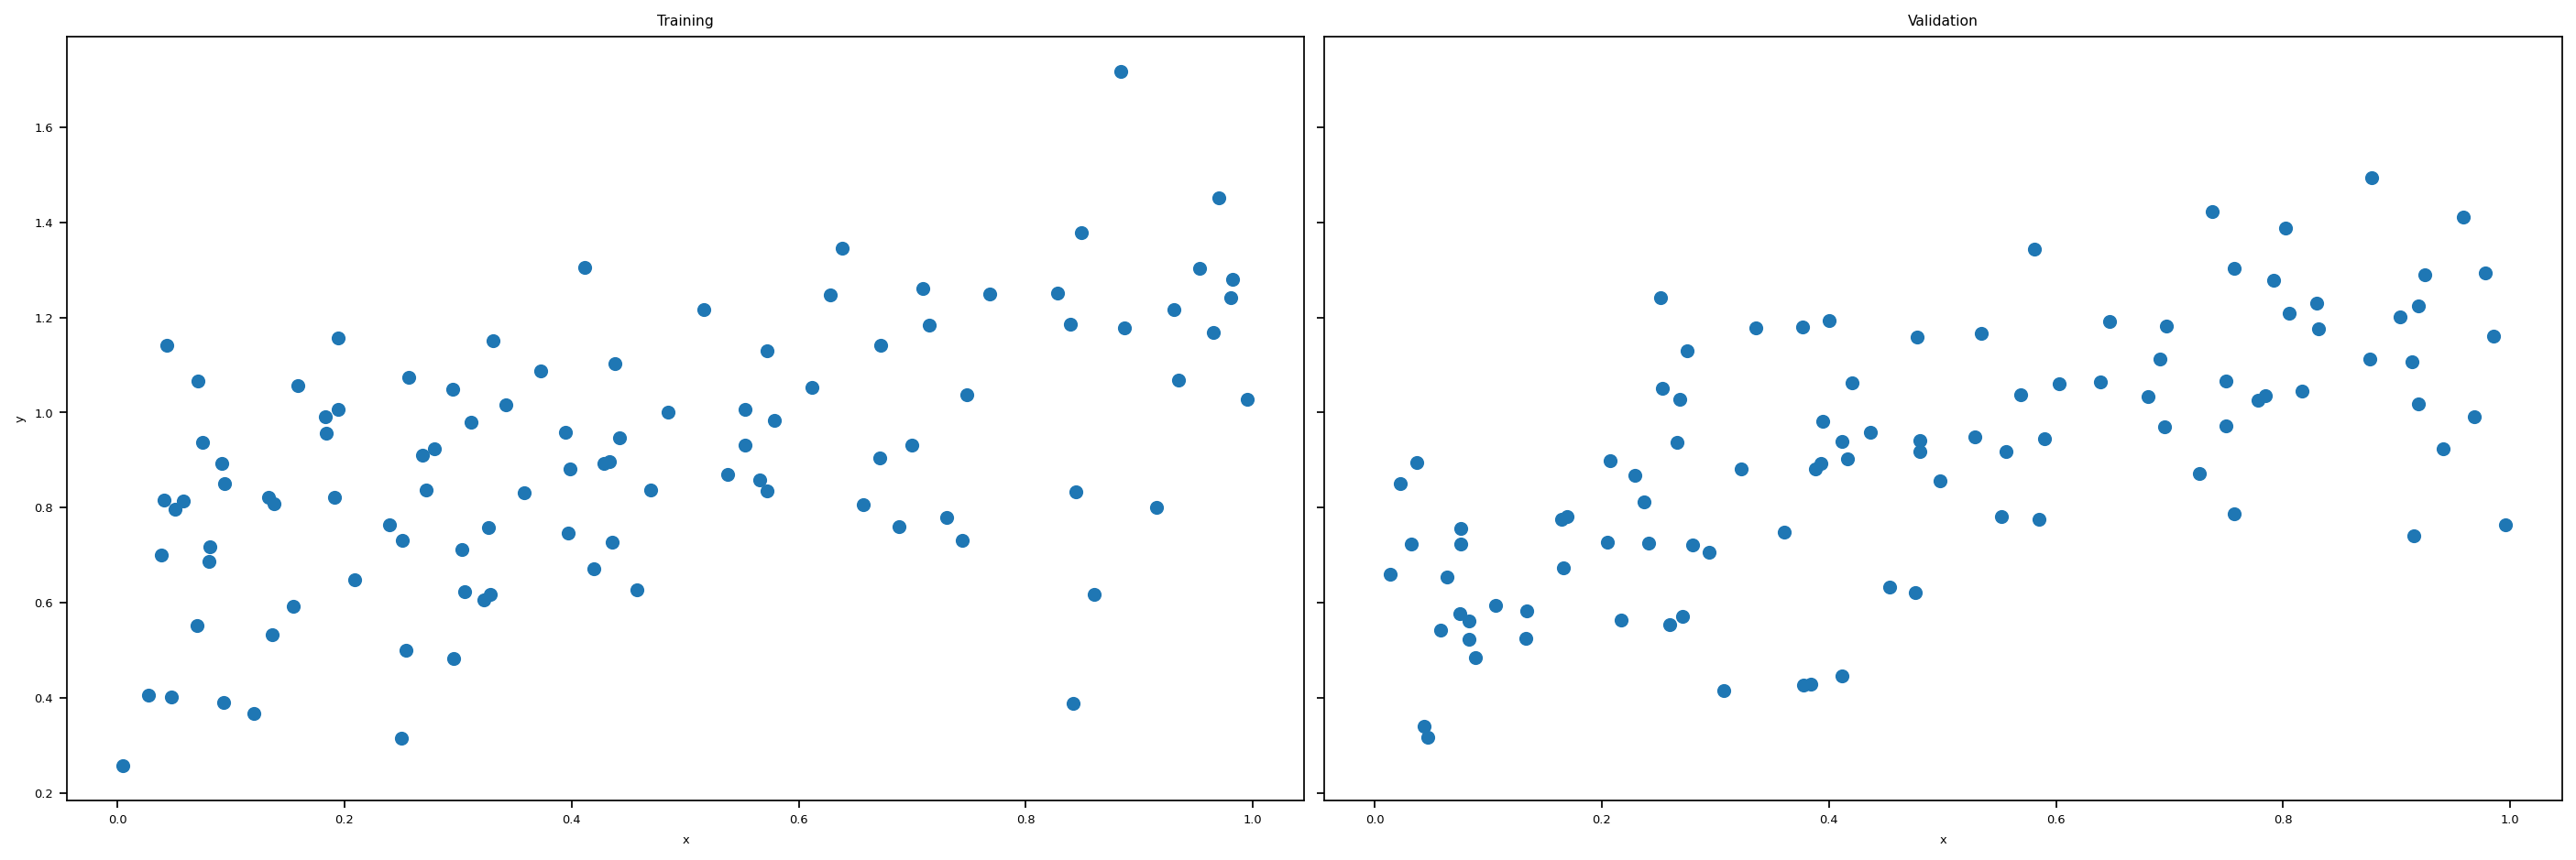

In [28]:
n_train = 100
n_val = 100
p_features = 1 
noise = 0.2

# create some data
LR = LinearRegression()
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Now we experiment with the number of features being `n_train - 1`, which is quite a lot features. Are we going to have a high training score? Let's find out!

In [29]:

n_train = 100
n_val = 100
p_features = n_train - 1 
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)


Here's the snippets within the `fit_gradient` function that makes the same code work for different number of features: 

`features = X_.shape[1]`

`self.w = np.random.rand(features)`

In [41]:
from linear_regression import LinearRegression 
LR = LinearRegression()
X_train_ = LR.pad(X_train)
X_val_ = LR.pad(X_val)
LR.fit_analytic(X_train_, y_train) # I used the analytical formula as my default fit method
print(f"Training score = {LR.score(X_train_, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val_, y_val).round(4)}")

Training score = 0.0333
Validation score = -0.2332


We see that our training score is very close to zero, hence very low.

In [42]:
print(f"The estimated weight vector w is: {LR.w}")
print(f"Training Loss = {LR.Big_L(X_train_, y_train).round(2)}")
print(f"Validation Loss = {LR.Big_L(X_val_, y_val).round(2)}")


The estimated weight vector w is: [-1.60048517 -3.1978511   0.80566383  1.10203529  1.36187644 -0.47123621
  1.06288478 -0.49759679  0.88232925 -3.21484205  1.00067548 -0.85983013
  0.36202332  0.61615846  3.23278271  0.49621812  1.51714629 -1.97442441
  2.91490824 -0.56270441  1.34873889 -4.33324786 -3.39289948 -1.86798015
 -4.24483306 -3.9345999  -0.38623783  0.77311176  2.2738731  15.68998649]
Training Loss = 0.0
Validation Loss = 20.17


Let's plot the score history and loss history to get a better idea of what's going on here. We see that we get pretty low scores, and our loss history doesn't look very good. Hence, our OLS regression is not super good when the number of features gets to large.

Training score = -5.9295
Validation score = -6.2086


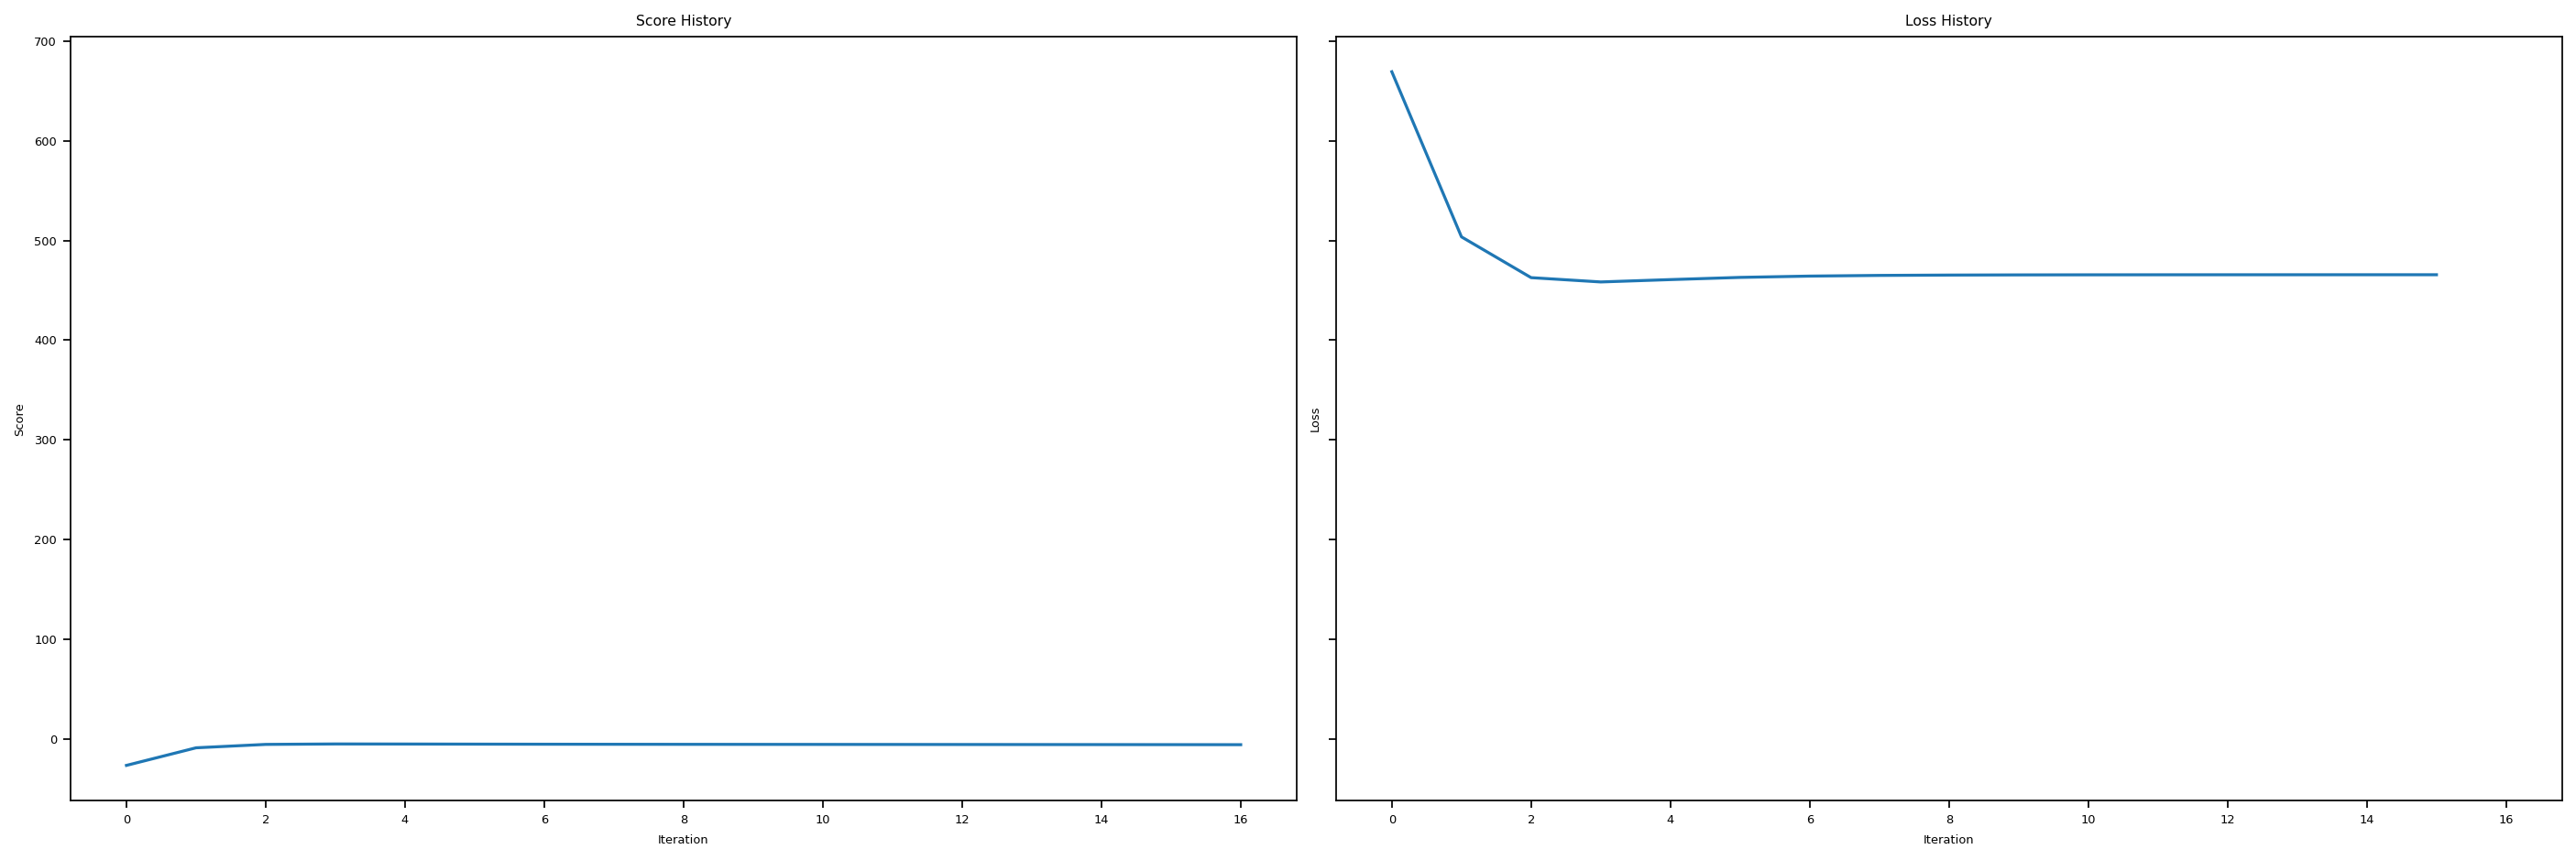

In [32]:
LR5 = LinearRegression()

LR5.fit_gradient(X_train_, y_train, 0.0001, 1000)
print(f"Training score = {LR5.score(X_train_, y_train).round(4)}")
print(f"Validation score = {LR5.score(X_val_, y_val).round(4)}")

# plt.plot(LR2.score_history)
# labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].plot(LR5.score_history)
axarr[1].plot(LR5.loss_history)
labs = axarr[0].set(title = "Score History", xlabel = "Iteration", ylabel = "Score")
labs = axarr[1].set(title = "Loss History", xlabel = "Iteration", ylabel = "Loss")
plt.tight_layout()

### LASSO Regularization
In this last section, let us recall that LASSO uses a modified loss function of the following expression:
$$ L(w) = \lVert X \cdot w -y \rVert ^2_2 + \sum_{j=1}^{p-1} \alpha \cdot | w_j |. $$
And hopefully, LASSO will be a better option when number of features gets too big.

In [33]:
L2 = Lasso(alpha = 0.01)

In [34]:

n_train = 30 
n_val = 30
p_features = 1 
noise = 0.2
p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2.score(X_val, y_val)

0.5877132844037414

Hey, this score is not bad!

In [35]:
LR4 = LinearRegression()
LR4.lasso_score(n_train, n_val, noise)
LR4.lin_regress_score(n_train, n_val, noise)
LR4.lin_regress_score_analytic(n_train, n_val, noise)


Let's use a custom function that we implemented in `linear_regression.py` to increase the number of features one by one, and for each number of feature, we generate a new sythetic data set and fit the $3$ regressions we introduced so far. Then we plot the Score history for all three regressions against number of features, so y-axis is score, and x-axis is number of features. In this way, we could see clearly how `fit_gradient`, `fit_analytic`, and LASSO perform as the number of features increases to up to $n$, which is the number of data points.

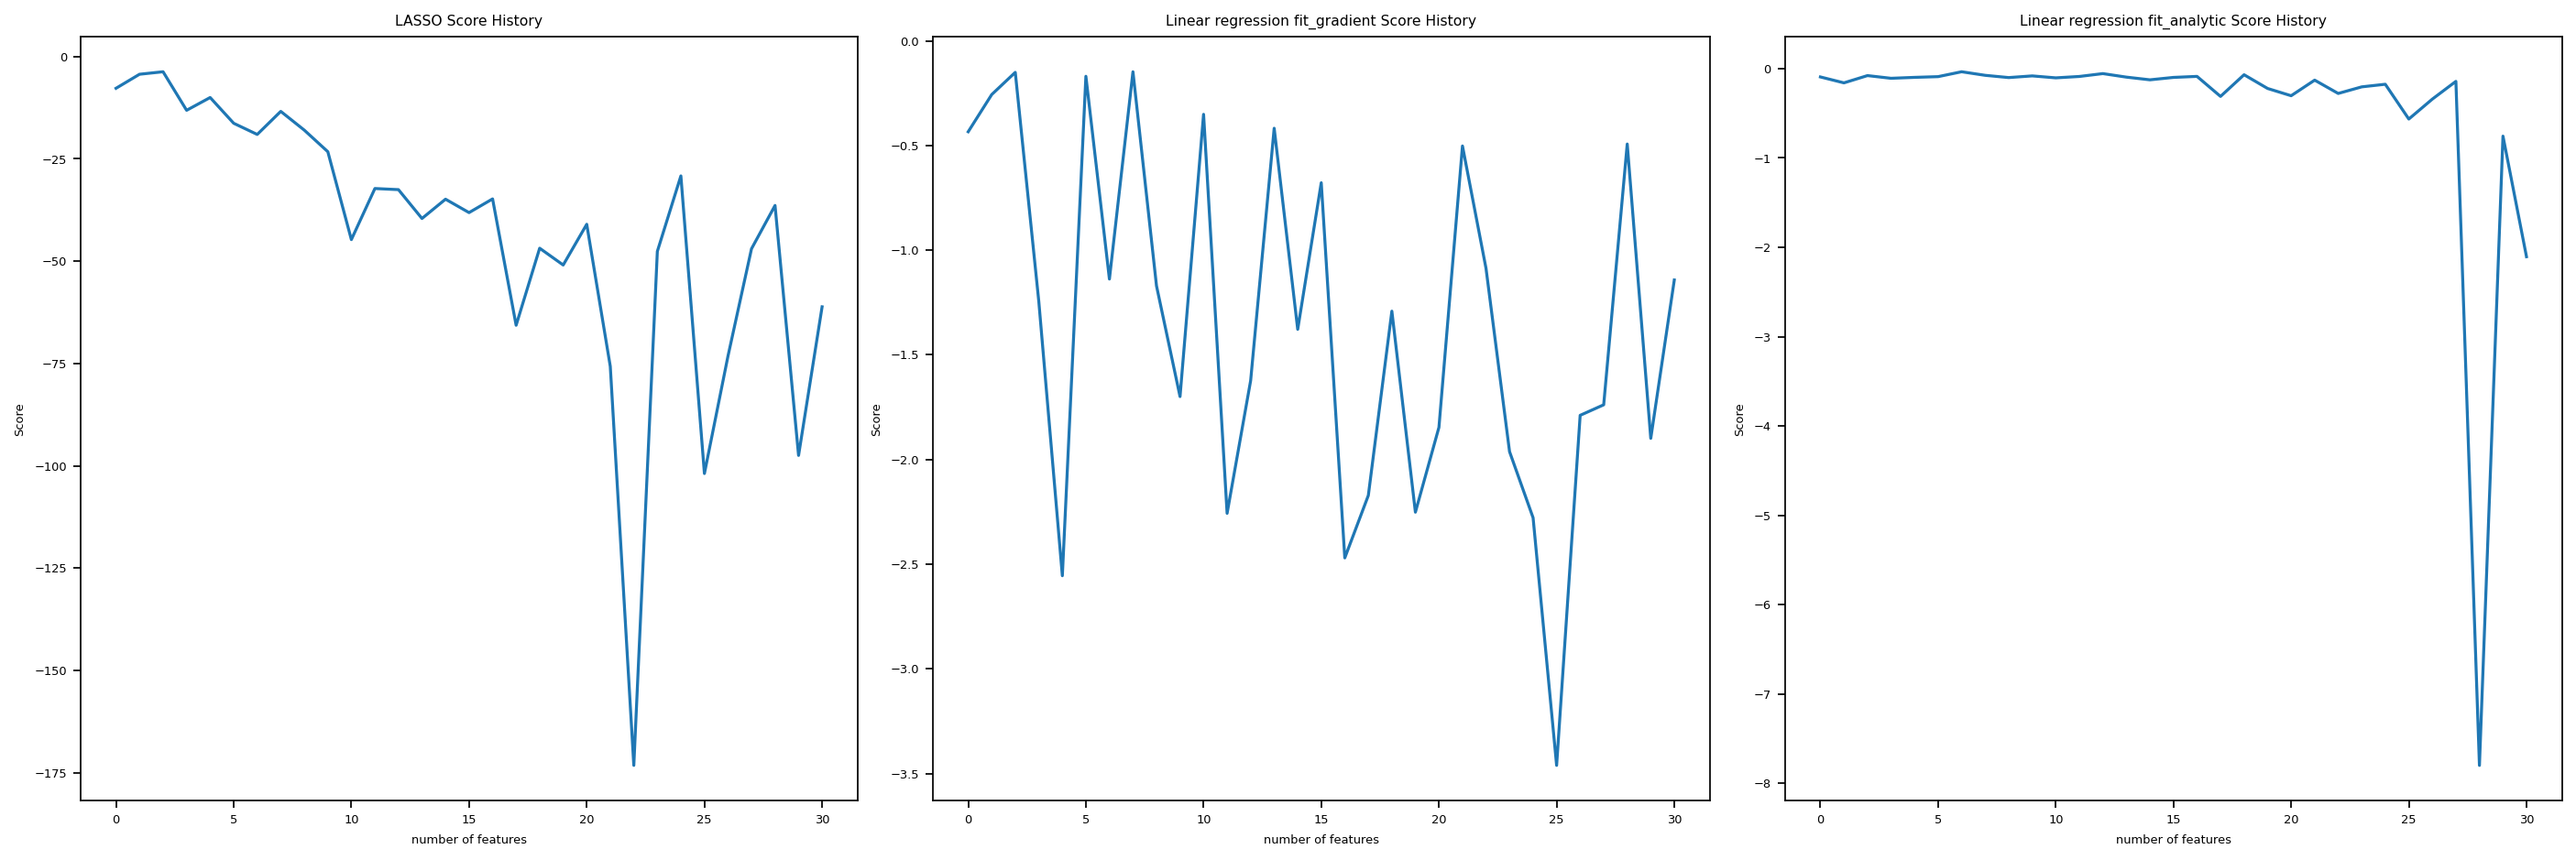

In [36]:
# from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi = 156)
fig, axarr = plt.subplots(1, 3, sharex = False, sharey = False)
axarr[0].plot(LR4.lasso_score_history)
axarr[1].plot(LR4.fit_gradient_score_history)
axarr[2].plot(LR4.fit_analytic_score_history)
labs = axarr[0].set(title = "LASSO Score History", xlabel = "number of features", ylabel = "Score")
labs = axarr[1].set(title = "Linear regression fit_gradient Score History", xlabel = "number of features", ylabel = "Score")
labs = axarr[2].set(title = "Linear regression fit_analytic Score History", xlabel = "number of features", ylabel = "Score")
plt.tight_layout()

We see, it turns out that all three are not doing super well as the number of feature increases. The score goes up and down wildly, and especially for `fit_analyitic`, it seems that the score just fall off the cliff at one point and then bounced back somehow. Hence, as the number of features increases too much, we tend to have problems with the three regressions we introduced in this post. 